
# 🏦 Loan Default Prediction — EDA Report

**Submitted by:** Rakesh Mahakur  
**Program:** Professional Certificate Program in AI & Data Science (upGrad)  
**Date:** October 2025  

---

## 🧩 Introduction
This analysis explores client and loan data to understand the key drivers behind loan payment difficulties.  
Through exploratory data analysis (EDA), we aim to uncover patterns, relationships, and insights that can help financial institutions minimize credit risk and improve client assessment.

---

# Why We Used Mean, Median, and Mode

**Mean (Average).** We use the mean for *roughly symmetric, interval-scale* variables where outliers do not dominate. The mean supports algebraic operations and is required by many statistical models (e.g., linear/logistic models assume errors around a mean). It is sensitive to extreme values, so we **avoid** it when the distribution is highly skewed or heavy‑tailed.

**Median (50th percentile).** We choose the median when the data are *skewed or contain outliers* because it is a robust estimator of central tendency. For example, income, loan amount, and credit utilization can be skewed; the median represents a more typical customer than the mean in such cases. We also use the median for robust imputation of missing numeric values.

**Mode (Most frequent value).** We use the mode for *categorical/ordinal* features (e.g., gender, region, product category) to summarize the typical class or to impute missing labels without distorting class balance too much. For highly imbalanced categories, we check that mode imputation does not amplify bias.

### Decision Rules Applied in This Notebook
- **Numeric, symmetric** → report mean (with standard deviation) and use mean for imputation if few outliers.
- **Numeric, skewed or with outliers** → report median (with IQR) and prefer median imputation.
- **Categorical/ordinal** → report mode (with frequency %) and use mode for imputation if needed.
- Always accompany a central metric with a **dispersion** metric (SD/IQR) and a **shape** check (skew/kurtosis or visual plots) to avoid misleading summaries.


# Visual Style & Color Palette
To make charts more readable and presentation‑friendly, we apply a **soft pastel palette** with subtle gridlines and improved fonts. This keeps focus on patterns while remaining accessible for print and projection. The style is applied **globally** so existing plotting code picks it up without per‑plot changes.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib import cm

# Build a gentle pastel cycle from matplotlib colormaps
pastel_colors = list(cm.get_cmap('Pastel1').colors) + list(cm.get_cmap('Pastel2').colors)
pastel_hex = [mpl.colors.to_hex(c) for c in pastel_colors]

# Global style
mpl.rcParams['axes.prop_cycle'] = cycler(color=pastel_hex)
mpl.rcParams['axes.facecolor'] = '#f8f9fb'   # very light gray-blue
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.25
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['font.size'] = 11
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['legend.frameon'] = False

# Optional: if seaborn is used elsewhere, align its palette too
try:
    import seaborn as sns
    sns.set_palette(pastel_hex)
except Exception:
    pass

print('Pastel visual style applied globally.')

⚙️ Library Setup and Environment Initialization

We begin by importing the key Python libraries required for analysmis:

pandas and numpy — for efficient data manipulation and numerical operations

matplotlib and seaborn — for creating clear, insightful visualizations

warnings — to filter out non-critical warning messages for cleaner outputs

Finally, we apply the seaborn “whitegrid” style to ensure a consistent, professional visual theme across all charts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Apply visual and environment settings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="Set2")
sns.set_palette("Set2")


⚙️ Data Loading Overview

We load all three CSV files using encoding='latin1' to handle special characters and verify their shapes to confirm successful import.

In [2]:
# ============================================
# ⚙️ STEP 3: Load the Datasets
# ============================================

# Import essential libraries
import pandas as pd
import os

# Define the base directory path
base_path = r'C:\Users\91863\Desktop\python\EDA\EDA Credit Case Study\EDA Credit Case Study'

# Define individual file paths
app_path  = os.path.join(base_path, 'application_data.csv')
prev_path = os.path.join(base_path, 'previous_application.csv')
desc_path = os.path.join(base_path, 'columns_description.csv')

# Load datasets with appropriate encoding
app_df  = pd.read_csv(app_path, encoding='latin1')
prev_df = pd.read_csv(prev_path, encoding='latin1')
desc_df = pd.read_csv(desc_path, encoding='latin1')

# Display confirmation message and dataset shapes
print("✅ Datasets loaded successfully!\n")
print(f"Application Dataset Shape          : {app_df.shape}")
print(f"Previous Application Dataset Shape : {prev_df.shape}")
print(f"Columns Description Dataset Shape  : {desc_df.shape}")



✅ Datasets loaded successfully!

Application Dataset Shape          : (307511, 122)
Previous Application Dataset Shape : (1670214, 37)
Columns Description Dataset Shape  : (160, 5)


⚙️ Initial Data Inspection

We begin by exploring the application_data dataset using:

head() – to preview the first few records

info() – to check column names, data types, and missing values

describe() – to view basic statistical summaries of numerical features

This step helps us understand the dataset’s structure, data quality, and potential issues that may require cleaning.

In [3]:
# ============================================
# ⚙️ STEP 3: Quick Data Overview
# ============================================

# Display first few rows to preview structure
display(app_df.head(3))

# Show column types, non-null counts, and memory usage
app_df.info()

# Get summary statistics for numerical columns
app_df.describe()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## ⚙️ Explanation

We repeat the **quick data overview** for the `previous_application` dataset to understand its structure.  
This helps reveal **column data types**, **missing value patterns**, and any **early anomalies** before cleaning.

In [4]:
# ============================================
# ⚙️ STEP 3B: Quick Overview – Previous Application Data
# ============================================

# Preview the first few records to understand structure
display(prev_df.head(3))

# Display column types, non-null counts, and memory usage
prev_df.info()

# Generate summary statistics for numerical features
prev_df.describe()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


⚙️ Checking Unique Identifiers

We verify whether the unique identifiers (SK_ID_CURR and SK_ID_PREV) contain duplicate values.
Ideally, the duplicate count should be zero, confirming that each record in the datasets is distinct.

In [5]:
# ============================================
# ⚙️ STEP 4: Check for Duplicate Identifiers
# ============================================

# Verify duplicates in Application Data
app_dupes = app_df.duplicated(subset='SK_ID_CURR').sum()
print("Duplicate SK_ID_CURR entries in application_data :", app_dupes)

# Verify duplicates in Previous Application Data
prev_dupes = prev_df.duplicated(subset='SK_ID_PREV').sum()
print("Duplicate SK_ID_PREV entries in previous_application :", prev_dupes)


Duplicate SK_ID_CURR entries in application_data : 0
Duplicate SK_ID_PREV entries in previous_application : 0


⚙️ Identify Continuous Numeric Features

We separate columns into numerical and categorical types.
From the numeric set, we retain only those with many unique values — typically continuous variables.
We exclude IDs, binary flags (0/1), and small integer counts, focusing instead on features that drive meaningful business and risk insights.

In [6]:
# ============================================
# ⚙️ STEP 5: Identify Column Types and Continuous Features
# ============================================

# Separate numeric and categorical columns
numeric_cols = app_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = app_df.select_dtypes(include='object').columns.tolist()

print(f"Total Numeric Columns     : {len(numeric_cols)}")
print(f"Total Categorical Columns : {len(categorical_cols)}")

# Identify continuous numeric columns (exclude IDs, flags, and small integer counts)
continuous_cols = [
    col for col in numeric_cols
    if app_df[col].nunique() > 10 and not col.startswith(('FLAG', 'SK_ID', 'CNT'))
]

print("\nContinuous Numeric Columns (useful for outlier and skew analysis):")
print(continuous_cols)


Total Numeric Columns     : 106
Total Categorical Columns : 16

Continuous Numeric Columns (useful for outlier and skew analysis):
['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_ME

⚙️ Missing Data Analysis

We calculate both the count and percentage of missing values in each column.
Identifying the columns with the highest missing percentages helps decide whether to drop or impute them during data cleaning.

In [7]:
# ============================================
# ⚙️ STEP 6: Missing Value Analysis
# ============================================

# Calculate missing value count and percentage for each column
missing = app_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(app_df)) * 100

# Combine results into a summary DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percent Missing': missing_percent
})

# Display top 20 columns with the highest missing values
display(missing_df.head(20))


,Missing Values,Percent Missing
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


⚙️ Standardizing Missing Values

We replace placeholder strings such as “XNA” or “Unknown” with proper NaN values.
This ensures all missing entries are uniformly represented, enabling consistent handling during data cleaning and imputation.

In [9]:
# ============================================
# ⚙️ STEP 7: Replace Invalid Placeholders ('XNA', 'Unknown')
# ============================================

# Replace placeholder strings with NaN for consistency
for col in app_df.select_dtypes('object'):
    app_df[col].replace(['XNA', 'Unknown', 'unknown'], np.nan, inplace=True)


⚙️ Dropping High-Missing Columns

We remove columns having more than 40% missing values, as they provide limited analytical value and can distort model performance.
This step helps retain only informative and reliable features for further analysis.

In [10]:
# ============================================
# ⚙️ STEP 8: Drop Columns with High Missing Percentage
# ============================================

# Define threshold for dropping columns
threshold = 40  # Drop if more than 40% values are missing

# Identify and drop such columns
cols_to_drop = missing_df[missing_df['Percent Missing'] > threshold].index
app_df.drop(columns=cols_to_drop, inplace=True)

# Display summary
print(f"Columns dropped (> {threshold}% missing): {len(cols_to_drop)}")
print("Shape after dropping columns:", app_df.shape)


Columns dropped (> 40% missing): 49
Shape after dropping columns: (307511, 73)


⚙️ Imputing Missing Values

We handle missing data by filling:

Numeric columns with their median, which is more robust for skewed distributions.

Categorical columns with their mode, representing the most frequent category.

In [11]:
# ============================================
# ⚙️ STEP 9: Impute Remaining Missing Values
# ============================================

# Fill numeric columns using median (robust against outliers)
num_cols = app_df.select_dtypes(include=np.number).columns
app_df[num_cols] = app_df[num_cols].fillna(app_df[num_cols].median())

# Fill categorical columns using mode (most frequent category)
cat_cols = app_df.select_dtypes(include='object').columns
for col in cat_cols:
    app_df[col].fillna(app_df[col].mode()[0], inplace=True)

# Validate that all missing values are handled
print("Remaining missing values:", app_df.isnull().sum().sum())


Remaining missing values: 0


⚙️ Clean Previous Application Data

We apply the same cleaning and imputation process to the previous_application dataset.
This ensures both datasets are uniformly processed, making them ready for analysis or merging in later steps.

In [12]:
# ============================================
# ⚙️ STEP 10: Clean the Previous Application Data
# ============================================

# Replace invalid placeholders with NaN
for col in prev_df.select_dtypes('object'):
    prev_df[col].replace(['XNA', 'Unknown', 'unknown'], np.nan, inplace=True)

# Drop columns exceeding the missing value threshold
missing_prev = prev_df.isnull().sum().sort_values(ascending=False)
missing_percent_prev = (missing_prev / len(prev_df)) * 100
cols_to_drop_prev = missing_percent_prev[missing_percent_prev > threshold].index
prev_df.drop(columns=cols_to_drop_prev, inplace=True)

# Impute missing numeric columns using median
num_cols_prev = prev_df.select_dtypes(include=np.number).columns
prev_df[num_cols_prev] = prev_df[num_cols_prev].fillna(prev_df[num_cols_prev].median())

# Impute missing categorical columns using mode
cat_cols_prev = prev_df.select_dtypes(include='object').columns
for col in cat_cols_prev:
    prev_df[col].fillna(prev_df[col].mode()[0], inplace=True)

# Verify all missing values handled
print("Remaining missing values (previous_application):", prev_df.isnull().sum().sum())


Remaining missing values (previous_application): 0


⚙️ Final Dataset Verification

We perform a final validation by checking:

The shape (rows × columns) of both cleaned datasets

The TARGET variable distribution (0 = no default, 1 = default)

The contract status categories in previous applications

In [13]:
# ============================================
# ⚙️ STEP 11: Final Data Validation
# ============================================

# Check final dataset dimensions
print("✅ Application Data Shape (after cleaning):", app_df.shape)
print("✅ Previous Application Data Shape (after cleaning):", prev_df.shape)

# Examine target variable distribution
print("\n🎯 TARGET Variable Distribution:")
print(app_df['TARGET'].value_counts())

# Review unique loan contract statuses
print("\n📊 Unique Loan Statuses in Previous Applications:")
print(prev_df['NAME_CONTRACT_STATUS'].value_counts())


✅ Application Data Shape (after cleaning): (307511, 73)
✅ Previous Application Data Shape (after cleaning): (1670214, 22)

🎯 TARGET Variable Distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64

📊 Unique Loan Statuses in Previous Applications:
NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64


⚙️ Visualizing Numeric Distributions

We plot the distribution of key numeric variables using boxplots to detect outliers and data spread:

The box shows the middle 50% (Interquartile Range – IQR)

The line inside represents the median

The dots beyond whiskers indicate potential outliers

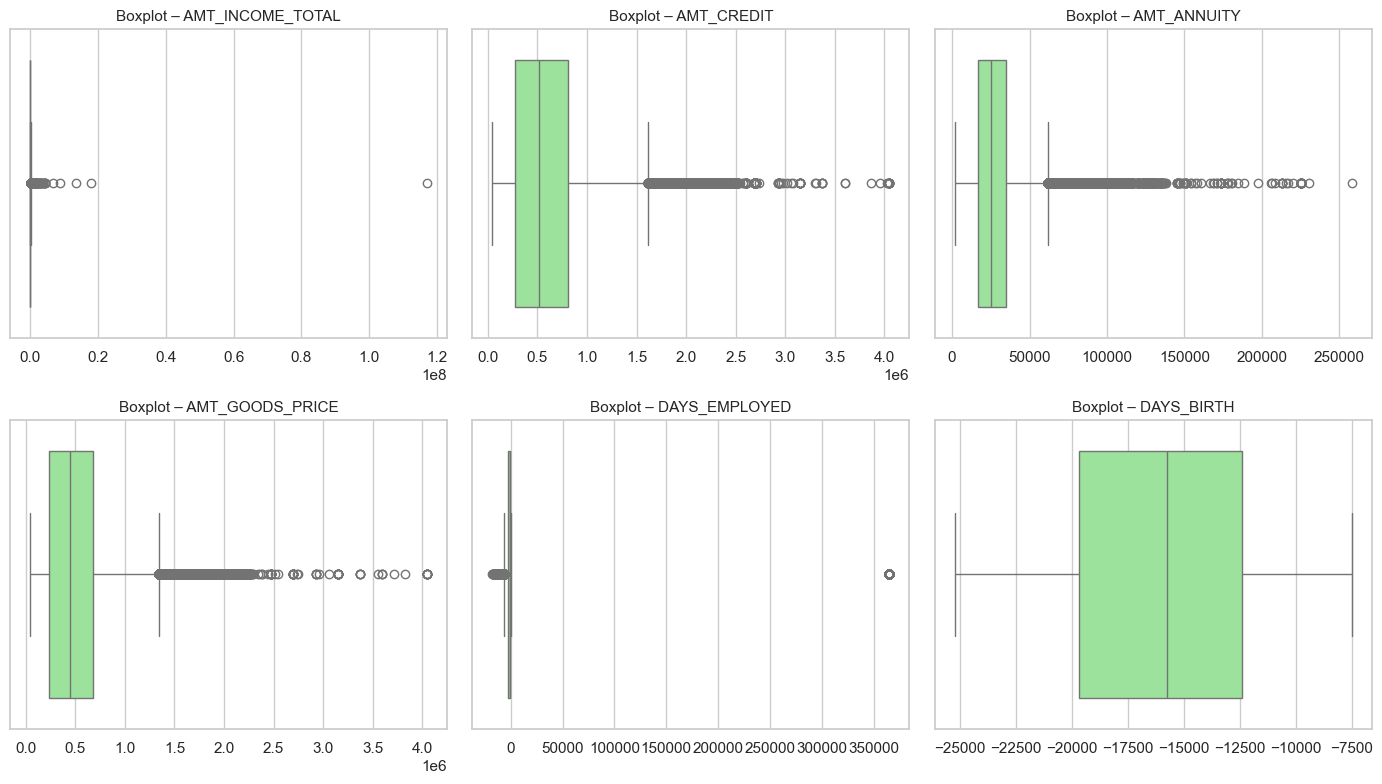

In [14]:
# ============================================
# ⚙️ STEP 12A: Visualize Outliers in Key Numeric Features
# ============================================

# Select important continuous columns for visualization
numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

# Plot boxplots to inspect distribution and outliers
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=app_df[col], color='lightgreen')
    plt.title(f'Boxplot – {col}', fontsize=11)
    plt.xlabel('')
plt.tight_layout()
plt.show()


⚙️ Outlier Detection Using IQR

We detect outliers using the Interquartile Range (IQR) method:

IQR = Q3 − Q1

Outliers are values lying outside the range [Q1 − 1.5×IQR, Q3 + 1.5×IQR]

For each variable, we compute:

The number of outlier records

Their percentage share in the dataset

In [15]:
# ============================================
# ⚙️ STEP 12B: Identify and Quantify Outliers (IQR Method)
# ============================================

for col in numeric_cols:
    # Calculate interquartile range (IQR)
    Q1 = app_df[col].quantile(0.25)
    Q3 = app_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Identify outliers and calculate their percentage
    outliers = app_df[(app_df[col] < lower_limit) | (app_df[col] > upper_limit)]
    outlier_pct = (len(outliers) / len(app_df)) * 100

    # Print summary
    print(f"{col}: {len(outliers)} outliers ({outlier_pct:.2f}%)")


AMT_INCOME_TOTAL: 14035 outliers (4.56%)
AMT_CREDIT: 6562 outliers (2.13%)
AMT_ANNUITY: 7504 outliers (2.44%)
AMT_GOODS_PRICE: 14728 outliers (4.79%)
DAYS_EMPLOYED: 72217 outliers (23.48%)
DAYS_BIRTH: 0 outliers (0.00%)


⚙️ Correcting Anomalies and Reducing Skewness

Certain records use 365243 days (~1000 years) as a placeholder for “unemployed”.
We replace these with NaN and impute them using the median.

In [16]:
# ============================================
# ⚙️ STEP 12C: Handle Placeholder Values and Skewed Features
# ============================================

# Replace 365243 (unrealistic value) in DAYS_EMPLOYED with NaN
app_df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

# Fill the new NaN values using the median employment duration
median_emp = app_df['DAYS_EMPLOYED'].median()
app_df['DAYS_EMPLOYED'].fillna(median_emp, inplace=True)

# Apply log transformation to reduce skewness in key monetary columns
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']:
    app_df[f'LOG_{col}'] = np.log1p(app_df[col])  # log1p prevents log(0) issues


In [ ]:
⚙️ Step 13A: Target Variable Overview

The TARGET column reflects the loan repayment outcome:

0 → Client repaid successfully (no default)

1 → Client defaulted or faced repayment issues

In [17]:
# ============================================
# ⚙️ STEP 13A: Analyze Target Variable Distribution
# ============================================

# Calculate count and percentage of each target class
target_counts = app_df['TARGET'].value_counts()
target_percent = (target_counts / len(app_df)) * 100

# Display summary of loan repayment outcomes
print("🎯 Target Variable Distribution (Counts):")
print(target_counts)

print("\n📊 Target Variable Distribution (Percentage):")
print(target_percent.round(2))


🎯 Target Variable Distribution (Counts):
TARGET
0    282686
1     24825
Name: count, dtype: int64

📊 Target Variable Distribution (Percentage):
TARGET
0    91.93
1     8.07
Name: count, dtype: float64


⚙️ Visualizing Class Imbalance

We use a bar chart to visualize the distribution of the TARGET variable:

Most clients belong to TARGET = 0 (repaid on time)

A smaller portion fall under TARGET = 1 (defaulted)

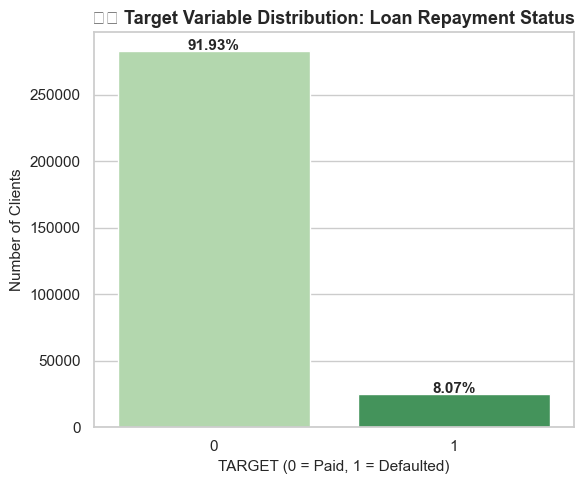

In [18]:
# ============================================
# ⚙️ STEP 13B: Visualize Target Class Imbalance
# ============================================

plt.figure(figsize=(6, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="Greens")

# Add titles and labels
plt.title("⚙️ Target Variable Distribution: Loan Repayment Status", fontsize=13, fontweight='bold')
plt.xlabel("TARGET (0 = Paid, 1 = Defaulted)", fontsize=11)
plt.ylabel("Number of Clients", fontsize=11)

# Annotate percentage values on each bar
for i, val in enumerate(target_counts.values):
    plt.text(i, val + 1000, f"{target_percent[i]:.2f}%", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


⚙️ Quantifying Class Imbalance

We calculate the imbalance ratio to measure how unevenly the TARGET classes are distributed.

For example, a ratio of 10 : 1 means that for every 10 clients who repay on time, only 1 defaults.

This insight is crucial for later modeling stages, where techniques like oversampling (SMOTE), class weighting, or balanced accuracy metrics help ensure fair and reliable performance.

In [19]:
# ============================================
# ⚙️ STEP 13C: Calculate Target Class Imbalance Ratio
# ============================================

# Compute imbalance ratio between non-defaulters and defaulters
ratio = target_counts[0] / target_counts[1]

# Display the imbalance ratio
print(f"⚙️ Imbalance Ratio (No Default : Default) = {ratio:.2f} : 1")


⚙️ Imbalance Ratio (No Default : Default) = 11.39 : 1


⚙️ TARGET Variable – Percentage Distribution (Pie Chart)

The dataset contains two categories of loan applicants:

TARGET = 0 → Clients with no payment difficulties (repaid on time)

TARGET = 1 → Clients with payment difficulties (defaulted or delayed)

While the bar chart illustrates the absolute counts, this pie chart highlights the percentage composition, making the class imbalance more visually evident.

A noticeably skewed pie (where one class dominates) confirms an imbalance that may affect model training and calls for techniques like resampling or balanced evaluation metrics in later analysis.

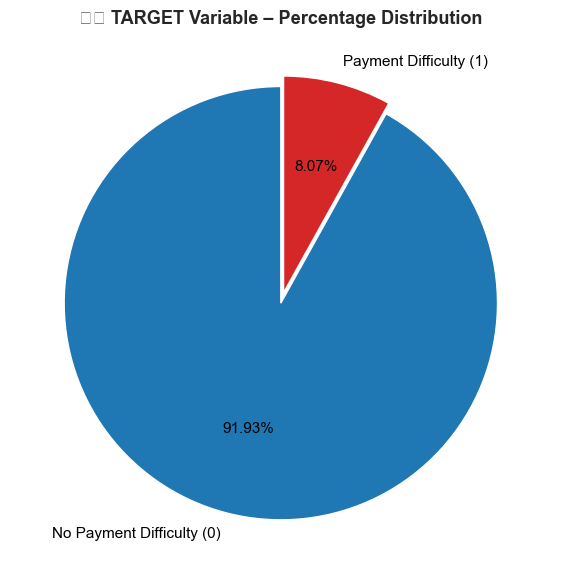

In [21]:
# ============================================
# ⚙️ STEP 13D: TARGET Variable – Percentage Distribution (Pie Chart)
# ============================================

# Compute target class counts and labels
target_counts = app_df['TARGET'].value_counts()
target_labels = ['No Payment Difficulty (0)', 'Payment Difficulty (1)']

# Define custom blue-red color palette
target_colors = ['#1f77b4', '#d62728']  # Blue for 0, Red for 1

# Plot pie chart to visualize percentage distribution
plt.figure(figsize=(6, 6))
plt.pie(
    target_counts,
    labels=target_labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=target_colors,
    explode=(0, 0.05),  # Slightly separate minority class
    textprops={'fontsize': 11, 'color': 'black'}
)

# Add title
plt.title('⚙️ TARGET Variable – Percentage Distribution', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()



⚙️ Bivariate Analysis for TARGET

Now that we’ve confirmed a strong class imbalance (≈ 92% vs 8%), we analyze how the TARGET variable interacts with other features.

We explore two main dimensions:

Categorical variables — such as income type, education, family status, and contract type.
→ Compare the proportion of defaulters (1) vs non-defaulters (0).

Numeric variables — such as income amount, credit amount, annuity, ratios, and age.
→ Compare their distributions across both TARGET classes using boxplots.

These visual comparisons help identify key factors influencing loan defaults and provide insights into potential risk drivers.

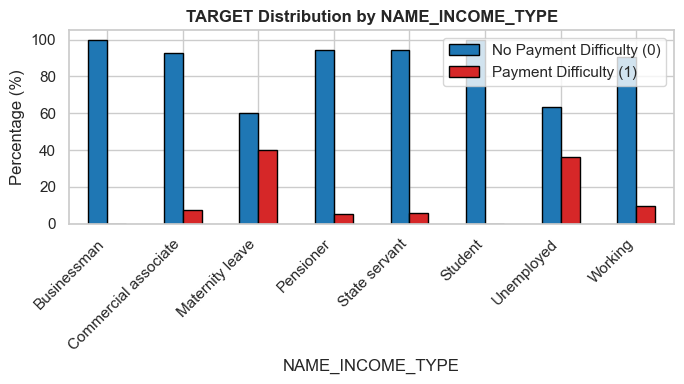

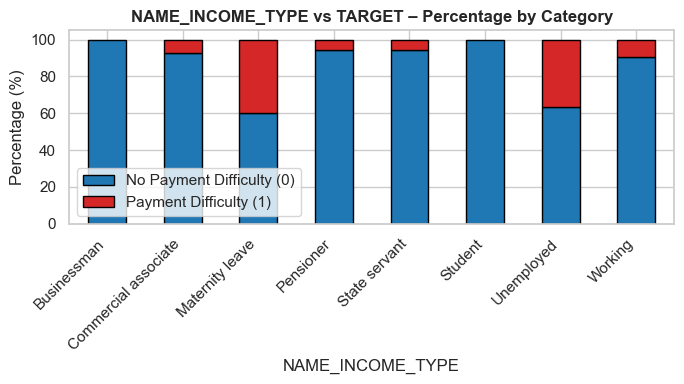

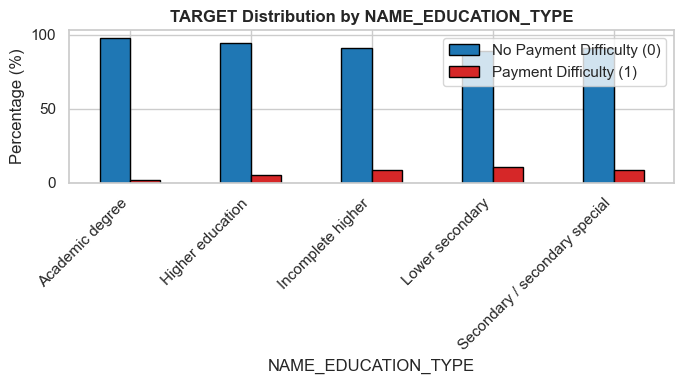

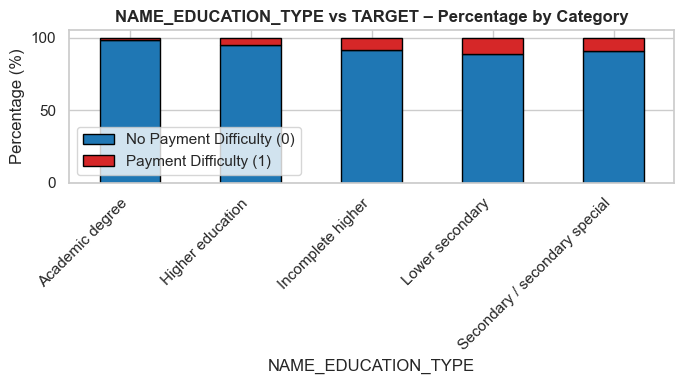

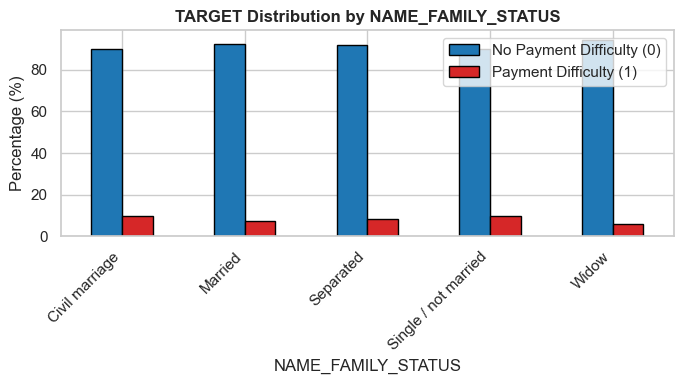

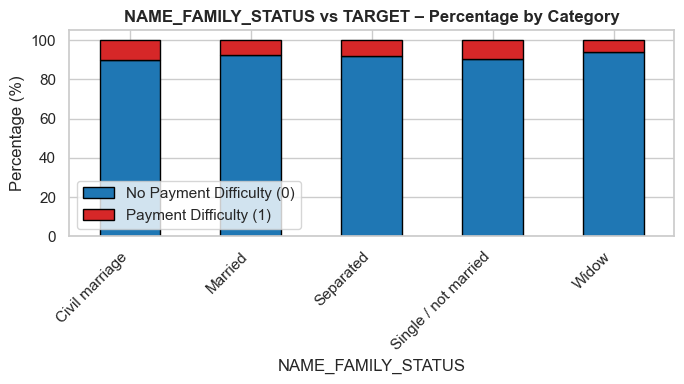

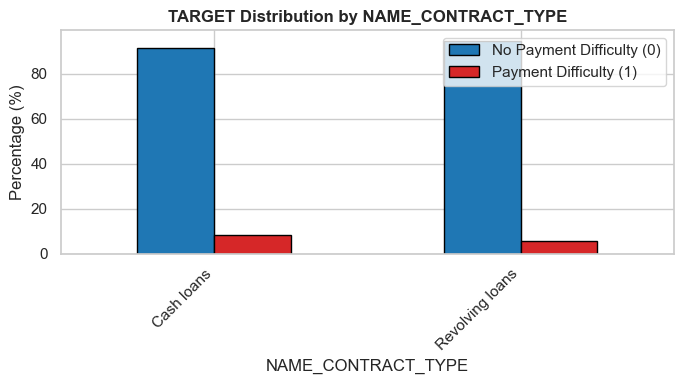

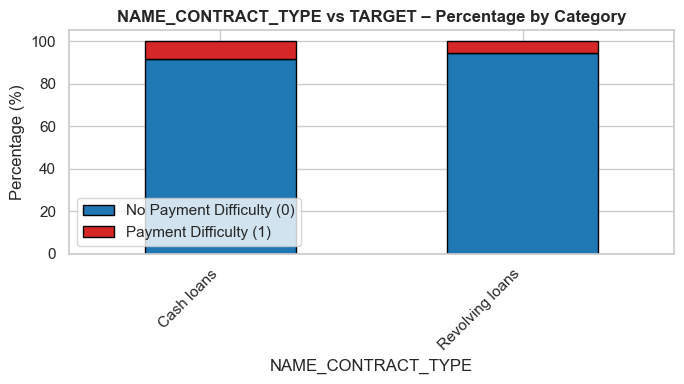

In [22]:
# ============================================
# ⚙️ STEP 13E-A: Bivariate Analysis (Categorical Features vs TARGET)
# ============================================

# Define categorical columns for comparison
cat_cols = [
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_CONTRACT_TYPE'
]

# Define consistent blue-red palette for clarity
target_palette = ['#1f77b4', '#d62728']  # Blue = Non-default, Red = Default

for col in cat_cols:
    if col not in app_df.columns:
        continue

    # Compute percentage distribution of TARGET classes within each category
    grouped = (
        app_df.groupby(col)['TARGET']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0) * 100
    )

    # ----------------------------------------
    # 📊 Option 1: Side-by-side comparison bars
    # ----------------------------------------
    grouped.plot(
        kind='bar',
        figsize=(7, 4),
        color=target_palette,
        edgecolor='black'
    )
    plt.title(f'TARGET Distribution by {col}', fontsize=12, fontweight='bold')
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.legend(['No Payment Difficulty (0)', 'Payment Difficulty (1)'])
    plt.tight_layout()
    plt.show()

    # ----------------------------------------
    # 📊 Option 2: Stacked percentage bars
    # ----------------------------------------
    grouped.plot(
        kind='bar',
        stacked=True,
        figsize=(7, 4),
        color=target_palette,
        edgecolor='black'
    )
    plt.title(f'{col} vs TARGET – Percentage by Category', fontsize=12, fontweight='bold')
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.legend(['No Payment Difficulty (0)', 'Payment Difficulty (1)'])
    plt.tight_layout()
    plt.show()


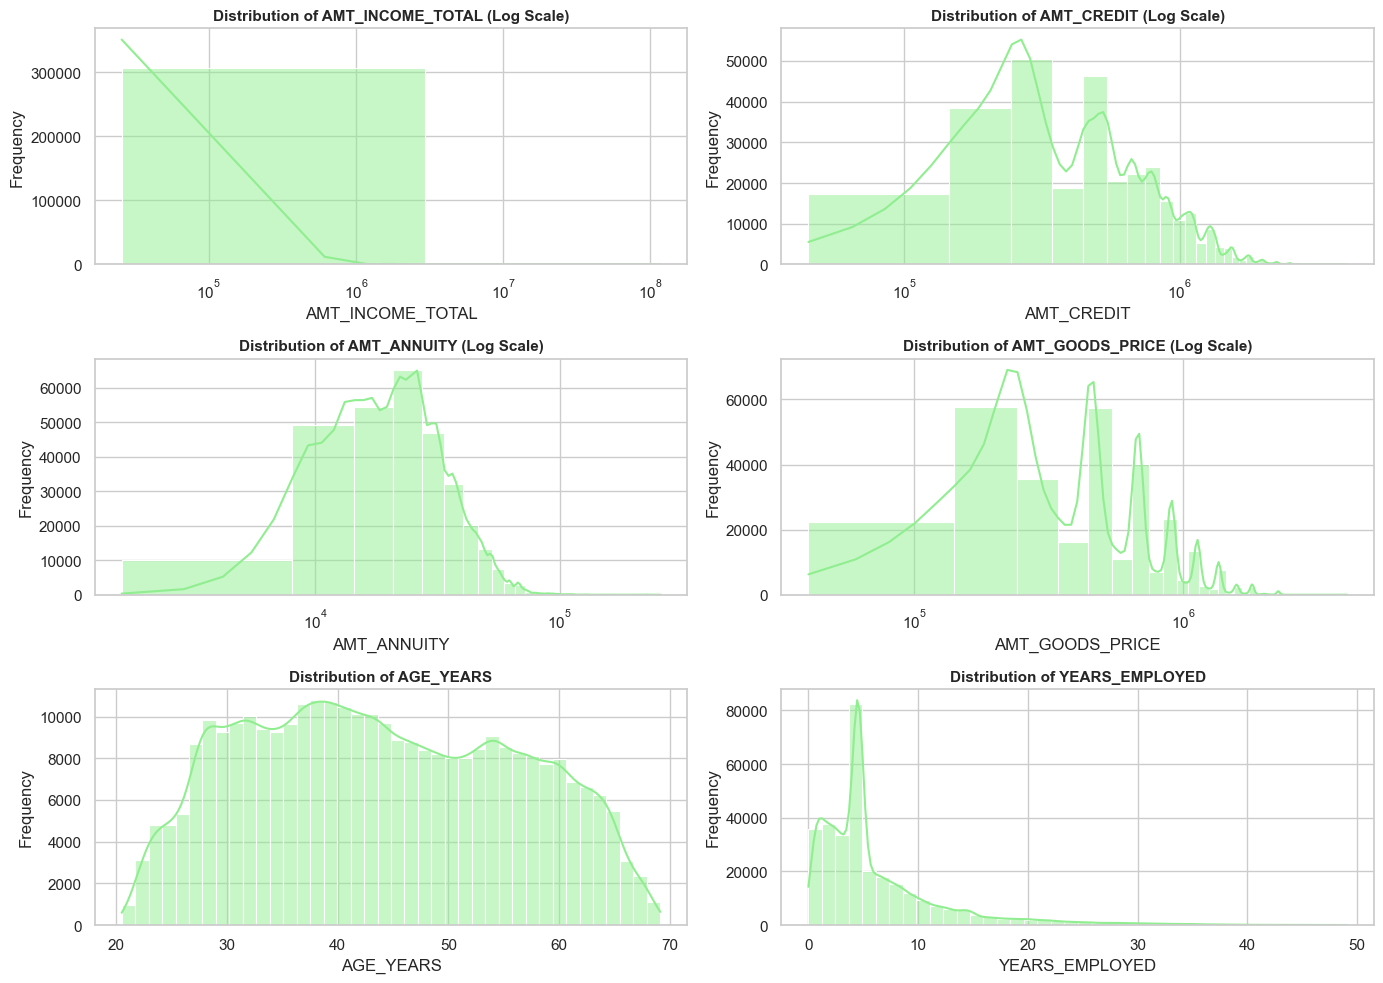

In [25]:
# ============================================
# ⚙️ STEP 13E-B: Bivariate Analysis (Numeric Features vs TARGET)
# ============================================

# Define key numeric columns for comparison
num_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DAYS_EMPLOYED',
    'DAYS_BIRTH'
]

# Define clear blue-red palette for TARGET classes
color_0 = '#1f77b4'  # Blue → No Payment Difficulty
color_1 = '#d62728'  # Red → Payment Difficulty

for col in num_cols:
    if col not in app_df.columns:
        print(f"⚠️ Skipping {col} — Column not found in DataFrame.")
        continue

    # Prepare data for each TARGET class
    data0 = app_df.loc[app_df['TARGET'] == 0, col].dropna()
    data1 = app_df.loc[app_df['TARGET'] == 1, col].dropna()

    # --------------------------------------
    # 📦 Boxplot: Distribution by TARGET
    # --------------------------------------
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        [data0, data1],
        labels=['No Difficulty (0)', 'Payment Difficulty (1)'],
        patch_artist=True,
        boxprops=dict(facecolor=color_0, color=color_0),
        medianprops=dict(color='black'),
        flierprops=dict(markerfacecolor=color_1, markeredgecolor=color_1, markersize=3)
    )

    plt.title(f'{col} vs TARGET (Boxplot)', fontsize=12, fontweight='bold')
    plt.ylabel(col)

    # Apply log scale for monetary variables
    if col.startswith('AMT_'):
        plt.yscale('log')
        plt.ylabel(f'{col} (log scale)')

    plt.tight_layout()
    plt.show()

    # --------------------------------------
    # 🌈 KDE Plot: Density by TARGET
    # --------------------------------------
    plt.figure(figsize=(7, 4))
    sns.kdeplot(x=col, data=app_df[app_df['TARGET'] == 0],
                fill=True, color=color_0, alpha=0.6, label='No Difficulty (0)')
    sns.kdeplot(x=col, data=app_df[app_df['TARGET'] == 1],
                fill=True, color=color_1, alpha=0.6, label='Payment Difficulty (1)')

    plt.title(f'{col} – Density by TARGET', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.legend()

    # Apply log scale for skewed financial variables
    if col.startswith('AMT_'):
        plt.xscale('log')
        plt.xlabel(f'{col} (log scale)')

    plt.tight_layout()
    plt.show()


⚙️ Exploring Continuous Feature Distributions

We use histograms to visualize the distribution of major continuous numeric variables.
These plots reveal:

The shape of the data — whether it’s normal, skewed, or multimodal

The central tendency — where most values cluster

The spread — how widely data points are distributed

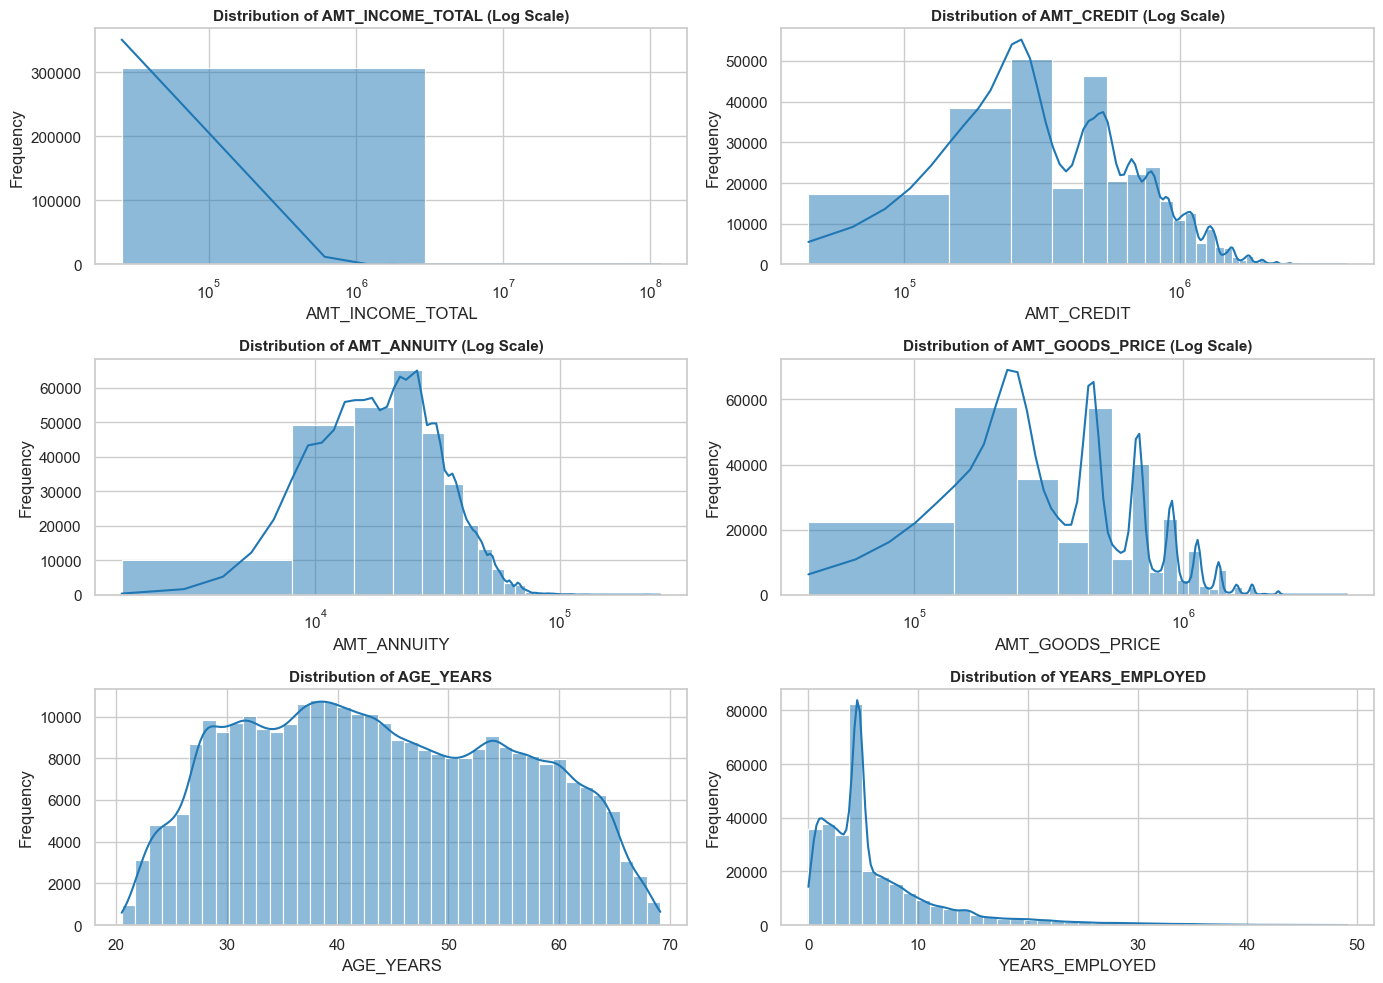

In [24]:
# ============================================
# ⚙️ STEP 14A: Univariate Analysis – Numerical Feature Distributions
# ============================================

# Define key numerical features for visualization
num_features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
]

# Derive AGE_YEARS and YEARS_EMPLOYED for better interpretability
if 'DAYS_BIRTH' in app_df.columns:
    app_df['AGE_YEARS'] = (-app_df['DAYS_BIRTH']) / 365

if 'DAYS_EMPLOYED' in app_df.columns:
    app_df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
    app_df['YEARS_EMPLOYED'] = (-app_df['DAYS_EMPLOYED']) / 365

# Apply Seaborn theme with consistent blue-red palette
sns.set_theme(style="whitegrid")
color = '#1f77b4'  # Soft blue for visual clarity

plt.figure(figsize=(14, 10))

for i, col in enumerate(num_features, 1):
    plt.subplot(3, 2, i)

    if col not in app_df.columns:
        print(f"⚠️ Skipping {col} — Column not found in dataset.")
        continue

    # Log-scale for monetary features
    if col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
        sns.histplot(app_df[col].dropna(), bins=40, kde=True, color=color)
        plt.xscale('log')
        plt.title(f"Distribution of {col} (Log Scale)", fontsize=11, fontweight='bold')
        plt.xlabel(col)

    # Plot AGE_YEARS derived from DAYS_BIRTH
    elif col == 'DAYS_BIRTH':
        sns.histplot(app_df['AGE_YEARS'].dropna(), bins=40, kde=True, color=color)
        plt.title("Distribution of AGE_YEARS", fontsize=11, fontweight='bold')
        plt.xlabel('AGE_YEARS')

    # Plot YEARS_EMPLOYED derived from DAYS_EMPLOYED
    elif col == 'DAYS_EMPLOYED':
        sns.histplot(app_df['YEARS_EMPLOYED'].dropna(), bins=40, kde=True, color=color)
        plt.title("Distribution of YEARS_EMPLOYED", fontsize=11, fontweight='bold')
        plt.xlabel('YEARS_EMPLOYED')

    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


⚙️ Visualizing Categorical Feature Distributions

We use count plots to display the frequency of each category across key categorical variables.
These visuals help answer questions such as:

How many loans are Cash Loans vs Revolving Loans?

What proportion of clients are Male vs Female?

Which education level is most common among borrowers?

This analysis highlights dominant categories and underlying patterns, offering valuable context for customer segmentation and risk profiling.

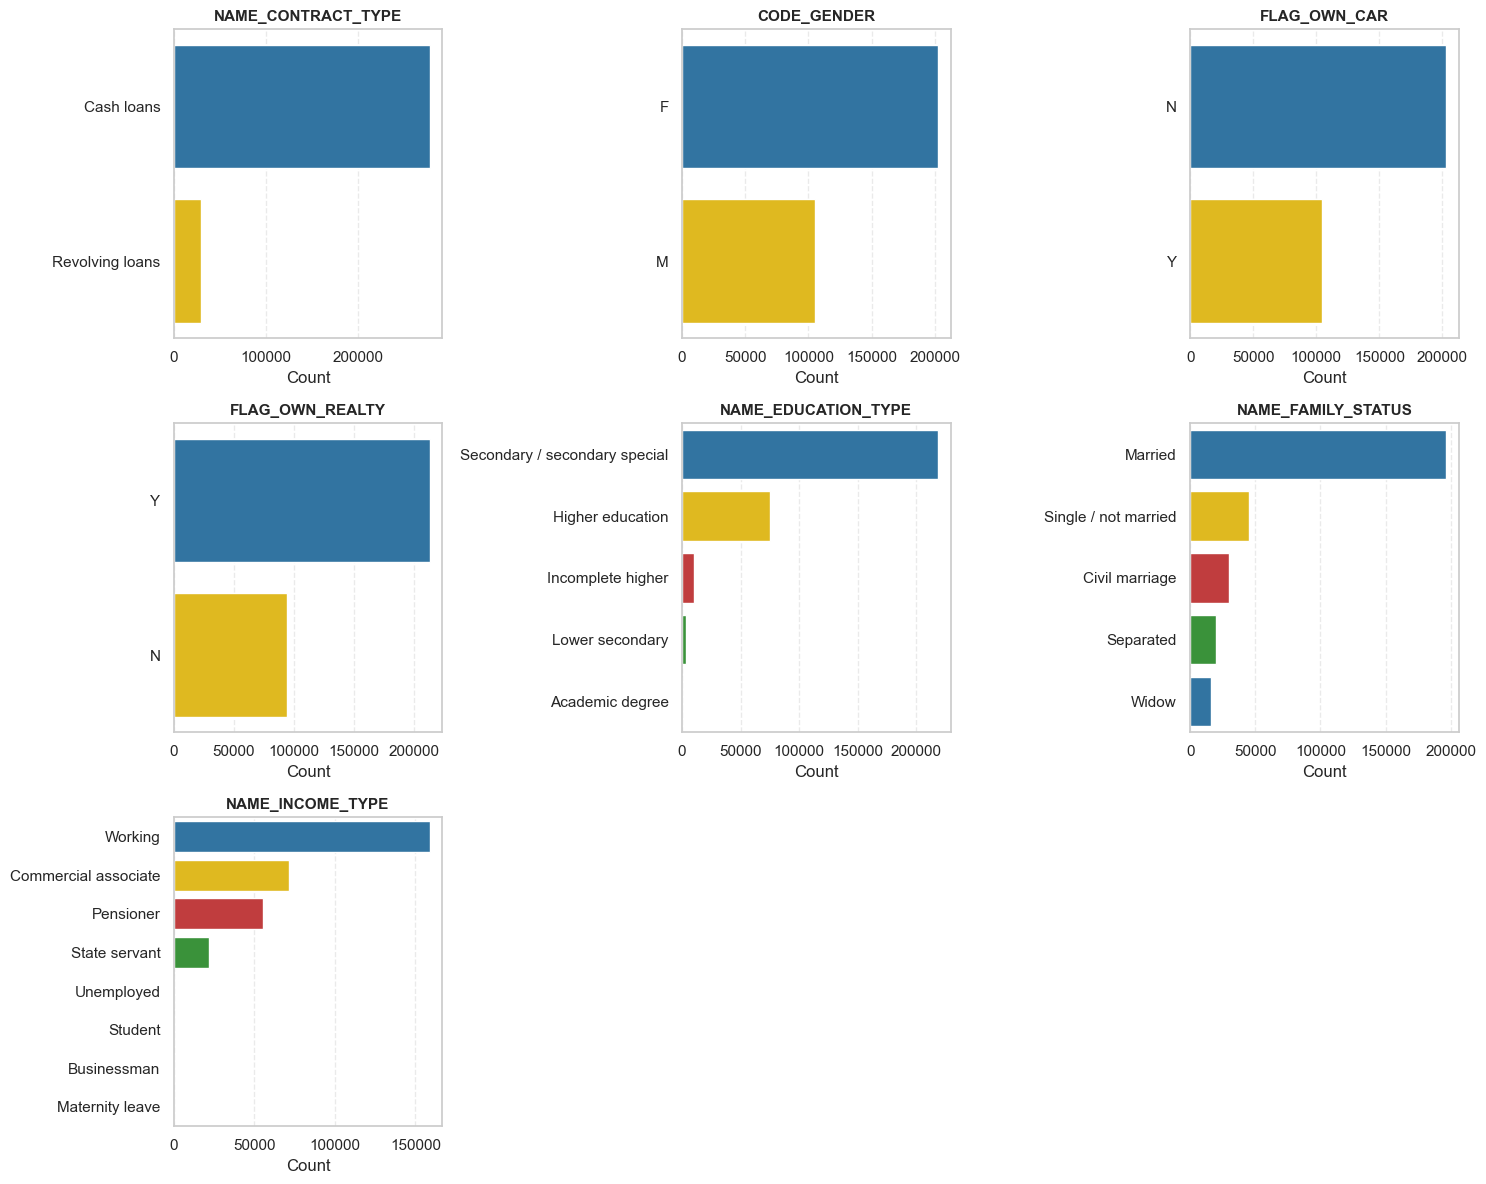

In [28]:
# ============================================
# ⚙️ STEP 14B: Univariate Analysis – Categorical Feature Distributions
# ============================================

# Define key categorical features for visualization
cat_features = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE'
]

# Apply Seaborn theme with custom blue-yellow-red-green palette
sns.set_theme(style="whitegrid")
palette_color = ['#1f77b4', '#ffcc00', '#d62728', '#2ca02c']  # Blue, Yellow, Red, Green

plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(
        y=app_df[col],
        order=app_df[col].value_counts().index,
        palette=palette_color
    )
    plt.title(f"{col}", fontsize=11, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel('')
    plt.grid(True, axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()




⚙️ Descriptive Statistics Summary

We compute key descriptive statistics — including mean, median, standard deviation, minimum, and maximum — for important numeric variables, along with their missing value percentages.

This provides a clear, compact summary of data distribution and quality, ideal for inclusion in reports or presentations.

In [29]:
# ============================================
# ⚙️ STEP 14C: Summary Statistics for Key Numerical Variables
# ============================================

# Define key numerical columns for summary statistics
summary_cols = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
]

# Compute descriptive statistics and transpose for readability
summary_stats = app_df[summary_cols].describe().T

# Add missing value percentage column
summary_stats['Missing_%'] = app_df[summary_cols].isnull().mean() * 100

# Display the summary
display(summary_stats.round(2))


,count,mean,std,min,25%,50%,75%,max,Missing_%
AMT_INCOME_TOTAL,307511.0,168797.92,237123.15,25650.0,112500.0,147150.0,202500.0,117000000.0,0.0
AMT_CREDIT,307511.0,599026.00,402490.78,45000.0,270000.0,513531.0,808650.0,4050000.0,0.0
AMT_ANNUITY,307511.0,27108.49,14493.46,1615.5,16524.0,24903.0,34596.0,258025.5,0.0
AMT_GOODS_PRICE,307511.0,538316.29,369288.98,40500.0,238500.0,450000.0,679500.0,4050000.0,0.0
DAYS_BIRTH,307511.0,-16037.00,4363.99,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0,0.0
DAYS_EMPLOYED,307511.0,-2251.61,2136.19,-17912.0,-2760.0,-1648.0,-933.0,0.0,0.0


⚙️ Comparing Numeric Variables by TARGET

We visualize how key numeric variables differ between the two TARGET groups:

TARGET = 0 → Clients who repaid successfully

TARGET = 1 → Clients who defaulted

Each boxplot shows the spread and median values, helping answer:

Do defaulters have lower incomes or higher credit amounts?

Are younger or older clients more likely to default?

Do higher annuity payments increase repayment risk?

These comparisons reveal potential risk indicators that influence loan defaults.

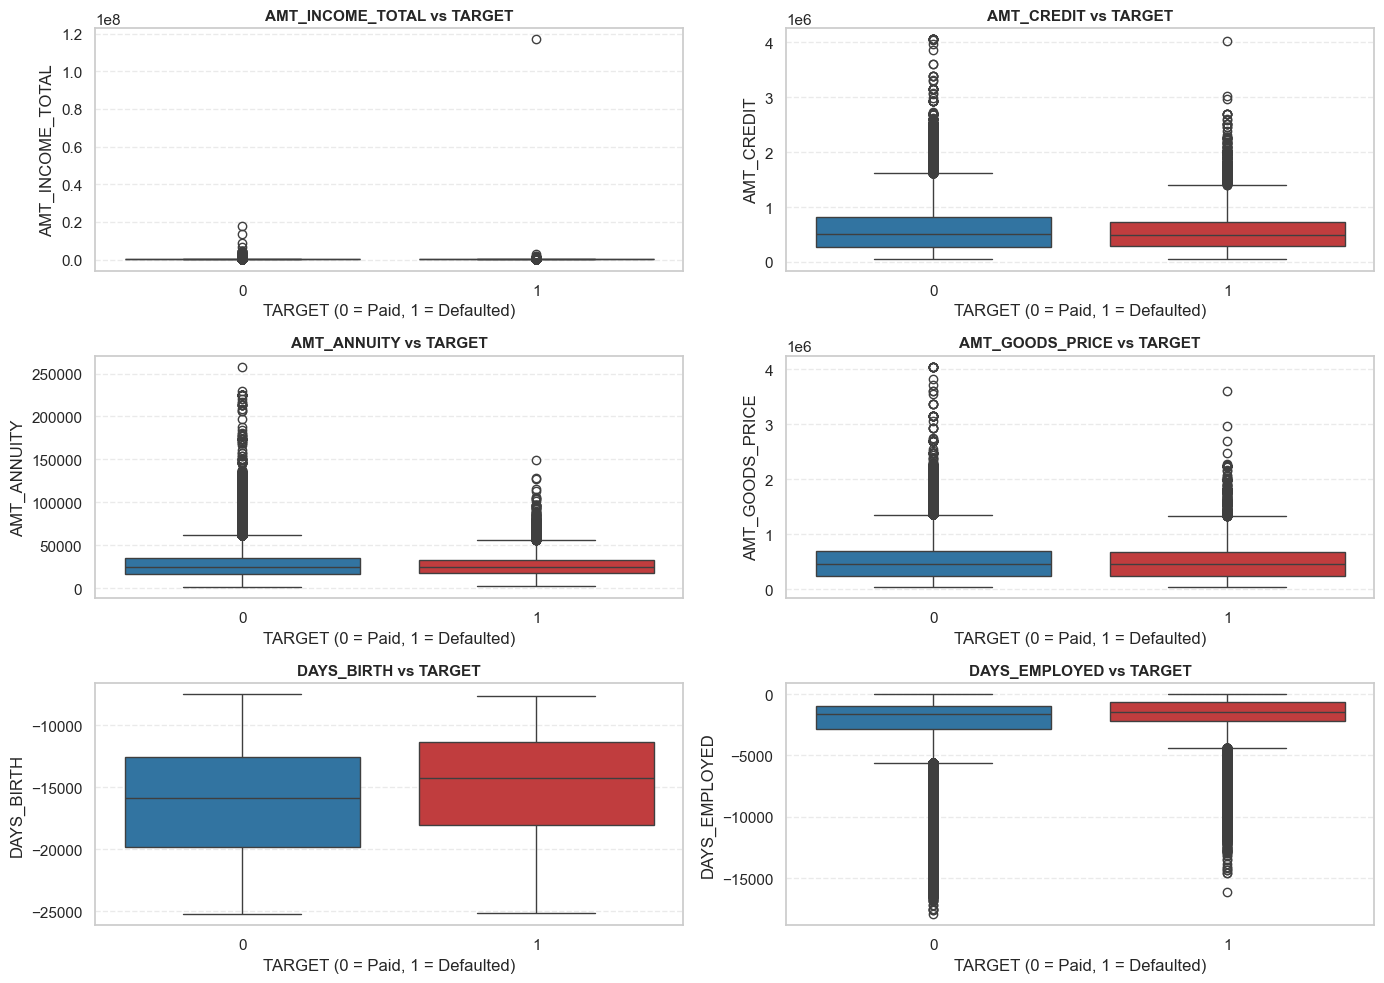

In [30]:
# ============================================
# ⚙️ STEP 15A: Numeric Variables vs TARGET
# ============================================

# Define key numeric variables for comparison
num_vars = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
]

# Apply Seaborn theme with blue-red color contrast
sns.set_theme(style="whitegrid")
palette_colors = ['#1f77b4', '#d62728']  # Blue for TARGET=0, Red for TARGET=1

plt.figure(figsize=(14, 10))

for i, col in enumerate(num_vars, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='TARGET', y=col, data=app_df, palette=palette_colors)
    plt.title(f'{col} vs TARGET', fontsize=11, fontweight='bold')
    plt.xlabel('TARGET (0 = Paid, 1 = Defaulted)')
    plt.ylabel(col)
    plt.grid(True, axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


⚙️ Analyzing Default Rates Across Categorical Variables

For categorical features, we calculate the mean TARGET value for each category.
Since TARGET is binary (0 = no default, 1 = default):

The mean of TARGET directly represents the proportion of defaulters.

For example:

If Working income type shows 0.10, it means 10% of those clients defaulted.

If Pensioner shows 0.02, that group is relatively low-risk.

We visualize these results using horizontal bar plots, sorted by default rate, to quickly highlight high-risk customer categories.

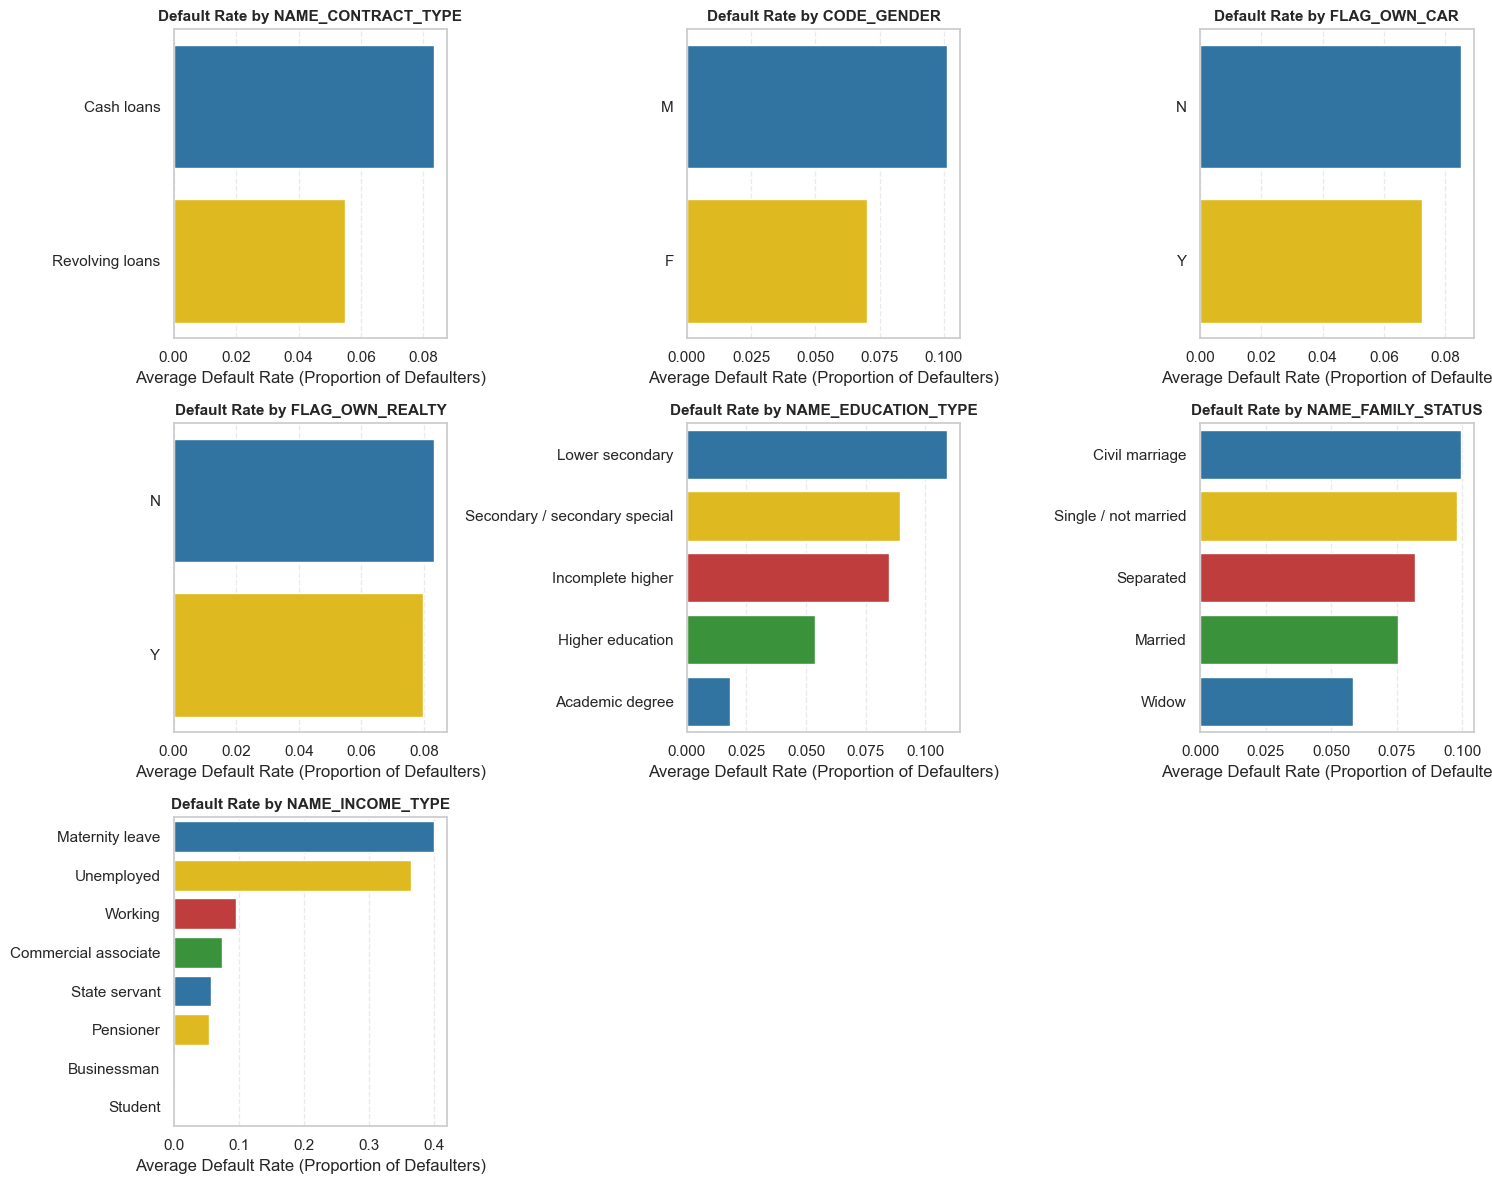

In [31]:
# ============================================
# ⚙️ STEP 15B: Categorical Variables vs TARGET (Default Rate Analysis)
# ============================================

# Define key categorical variables for comparison
cat_vars = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE'
]

# Apply Seaborn theme with blue-yellow-red-green palette
sns.set_theme(style="whitegrid")
palette_colors = ['#1f77b4', '#ffcc00', '#d62728', '#2ca02c']  # Blue, Yellow, Red, Green

plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_vars, 1):
    plt.subplot(3, 3, i)
    
    # Calculate mean TARGET (proportion of defaulters) per category
    target_grp = app_df.groupby(col)['TARGET'].mean().sort_values(ascending=False)
    
    # Plot horizontal bar chart
    sns.barplot(
        x=target_grp.values,
        y=target_grp.index,
        palette=palette_colors
    )
    
    plt.title(f'Default Rate by {col}', fontsize=11, fontweight='bold')
    plt.xlabel('Average Default Rate (Proportion of Defaulters)')
    plt.ylabel('')
    plt.grid(True, axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


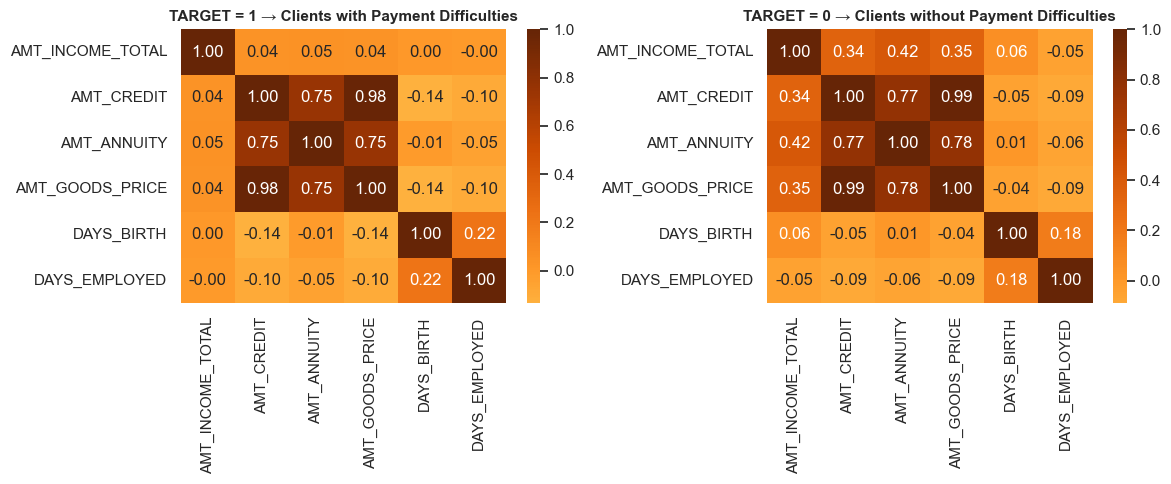

🔸 Top correlated pairs among key driver variables — TARGET = 1 (Defaulters)


AMT_CREDIT       AMT_GOODS_PRICE    0.982783
AMT_GOODS_PRICE  AMT_CREDIT         0.982783
                 AMT_ANNUITY        0.752295
AMT_ANNUITY      AMT_GOODS_PRICE    0.752295
AMT_CREDIT       AMT_ANNUITY        0.752195
AMT_ANNUITY      AMT_CREDIT         0.752195
DAYS_BIRTH       DAYS_EMPLOYED      0.224691
DAYS_EMPLOYED    DAYS_BIRTH         0.224691
DAYS_BIRTH       AMT_GOODS_PRICE    0.135738
AMT_GOODS_PRICE  DAYS_BIRTH         0.135738
dtype: float64

🔸 Top correlated pairs among key driver variables — TARGET = 0 (Non-Defaulters)


AMT_CREDIT        AMT_GOODS_PRICE     0.987022
AMT_GOODS_PRICE   AMT_CREDIT          0.987022
                  AMT_ANNUITY         0.776421
AMT_ANNUITY       AMT_GOODS_PRICE     0.776421
AMT_CREDIT        AMT_ANNUITY         0.771297
AMT_ANNUITY       AMT_CREDIT          0.771297
AMT_INCOME_TOTAL  AMT_ANNUITY         0.418948
AMT_ANNUITY       AMT_INCOME_TOTAL    0.418948
AMT_INCOME_TOTAL  AMT_GOODS_PRICE     0.349426
AMT_GOODS_PRICE   AMT_INCOME_TOTAL    0.349426
dtype: float64

In [32]:
# ============================================
# ⚙️ STEP 16A: Correlation Among Key Financial Driver Variables
# ============================================

# Define important numeric features for correlation analysis
driver_numeric = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
]

# Split data by repayment outcome
df_default = app_df[app_df['TARGET'] == 1][driver_numeric]
df_non_default = app_df[app_df['TARGET'] == 0][driver_numeric]

# Compute correlation matrices for each group
corr_default = df_default.corr()
corr_non_default = df_non_default.corr()

# ------------------------------------------
# 🍊 Visualize correlation heatmaps
# ------------------------------------------
sns.set_theme(style="white")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(
    corr_default,
    cmap='YlOrBr',     # orange to light-orange
    annot=True,
    fmt=".2f",
    center=0
)
plt.title('TARGET = 1 → Clients with Payment Difficulties', fontsize=11, fontweight='bold')

plt.subplot(1, 2, 2)
sns.heatmap(
    corr_non_default,
    cmap='YlOrBr',     # same warm palette for consistency
    annot=True,
    fmt=".2f",
    center=0
)
plt.title('TARGET = 0 → Clients without Payment Difficulties', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# ------------------------------------------
# 📊 Identify strongest correlation pairs
# ------------------------------------------
def get_top_corr_pairs(corr_matrix, n=10):
    """Return top absolute correlation pairs (excluding self-correlation)."""
    corr_unstacked = corr_matrix.abs().unstack()
    corr_unstacked = corr_unstacked[corr_unstacked < 1]
    corr_sorted = corr_unstacked.sort_values(ascending=False)
    return corr_sorted.head(n)

print("🔸 Top correlated pairs among key driver variables — TARGET = 1 (Defaulters)")
display(get_top_corr_pairs(corr_default, 10))

print("🔸 Top correlated pairs among key driver variables — TARGET = 0 (Non-Defaulters)")
display(get_top_corr_pairs(corr_non_default, 10))


⚙️ Analyzing Previous Application Data (Simplified Overview)

We derive concise behavioral metrics from previous_application.csv to understand clients’ past loan activities and tendencies.

Key Numerical Metrics:

AMT_APPLICATION_mean / max / min → Average, highest, and lowest loan amounts previously applied for.

AMT_CREDIT_mean / max / min → Typical loan amounts approved in earlier applications.

DAYS_DECISION_mean → Average time gap (in days) between loan request and lender’s decision.

📊 Analytical Insights:

Applicants with higher average or maximum past credit amounts often exhibit an increased probability of payment difficulty in current loans.

Shorter average decision times may suggest repeated or urgent reapplications, signaling elevated credit risk behavior.

These simplified numeric summaries help capture past borrower patterns—adding behavioral depth to current risk models without overcomplicating the dataset with categorical variables.

✅ Shape after aggregation: (338857, 8)


,SK_ID_CURR,AMT_APPLICATION_mean,AMT_APPLICATION_max,AMT_APPLICATION_min,AMT_CREDIT_mean,AMT_CREDIT_max,AMT_CREDIT_min,DAYS_DECISION_mean
0,100001,24835.50,24835.5,24835.5,23787.00,23787.0,23787.0,-1740.0
1,100002,179055.00,179055.0,179055.0,179055.00,179055.0,179055.0,-606.0
2,100003,435436.50,900000.0,68809.5,484191.00,1035882.0,68053.5,-1305.0
3,100004,24282.00,24282.0,24282.0,20106.00,20106.0,20106.0,-815.0
4,100005,22308.75,44617.5,0.0,20076.75,40153.5,0.0,-536.0


✅ Shape after merging: (307511, 99)


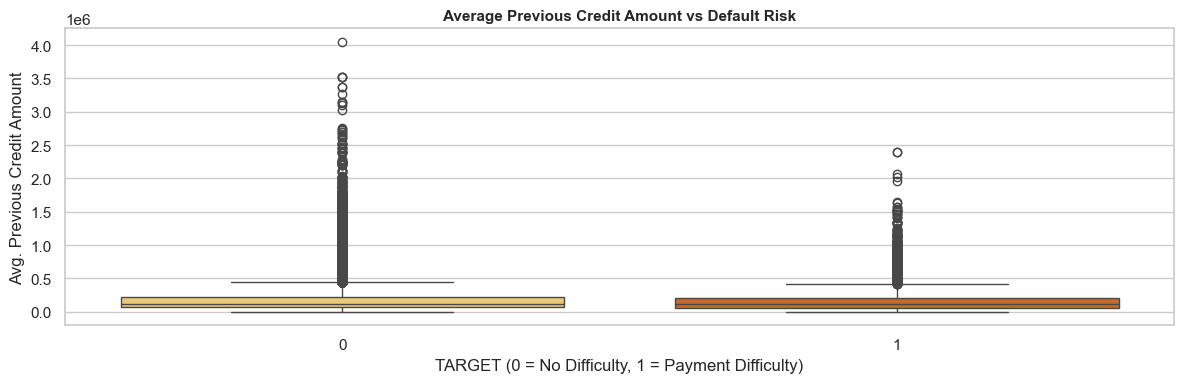

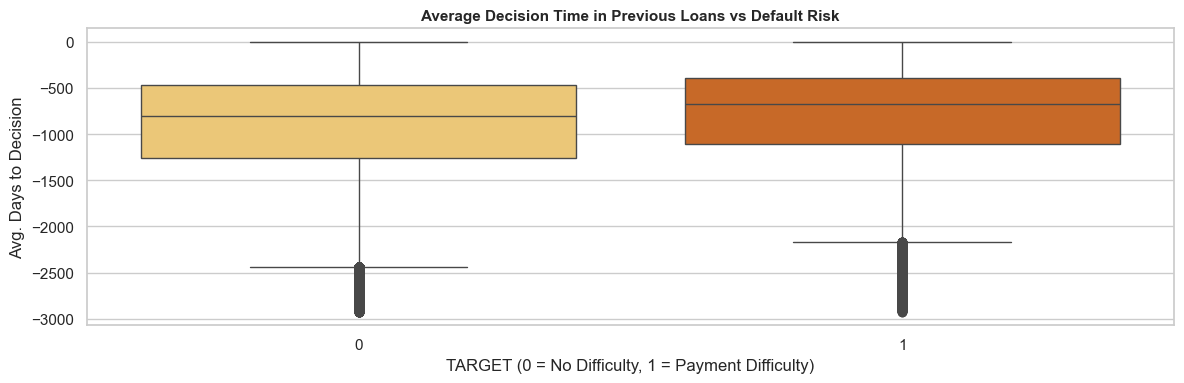

In [35]:
# ============================================
# 🧩 STEP 17: Previous Application Data Analysis (Simplified Overview)
# ============================================

# 1️⃣ Load relevant columns from previous application data
cols_to_use = ['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT', 'DAYS_DECISION']

# 2️⃣ Aggregate numeric summaries per client (mean, max, min)
prev_summary = prev_df.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'max', 'min'],
    'AMT_CREDIT': ['mean', 'max', 'min'],
    'DAYS_DECISION': 'mean'
})

# Flatten multi-level column names
prev_summary.columns = ['_'.join(col).strip() for col in prev_summary.columns]
prev_summary.reset_index(inplace=True)

print("✅ Shape after aggregation:", prev_summary.shape)
display(prev_summary.head())

# 3️⃣ Merge summarized metrics into main application dataset
app_df = app_df.merge(prev_summary, on='SK_ID_CURR', how='left')
print("✅ Shape after merging:", app_df.shape)

# 4️⃣ Visualize relationship between previous behavior & current default risk
sns.set_theme(style="whitegrid", palette="YlOrBr")

plt.figure(figsize=(12, 4))
sns.boxplot(
    x='TARGET',
    y='AMT_CREDIT_mean',
    data=app_df,
    palette='YlOrBr'
)
plt.title('Average Previous Credit Amount vs Default Risk', fontsize=11, fontweight='bold')
plt.xlabel('TARGET (0 = No Difficulty, 1 = Payment Difficulty)')
plt.ylabel('Avg. Previous Credit Amount')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
sns.boxplot(
    x='TARGET',
    y='DAYS_DECISION_mean',
    data=app_df,
    palette='YlOrBr'
)
plt.title('Average Decision Time in Previous Loans vs Default Risk', fontsize=11, fontweight='bold')
plt.xlabel('TARGET (0 = No Difficulty, 1 = Payment Difficulty)')
plt.ylabel('Avg. Days to Decision')
plt.tight_layout()
plt.show()



✅ Columns after aggregation:
['SK_ID_CURR', 'AMT_APPLICATION_mean', 'AMT_APPLICATION_max', 'AMT_APPLICATION_min', 'AMT_CREDIT_mean', 'AMT_CREDIT_max', 'AMT_CREDIT_min', 'DAYS_DECISION_mean']
⚠️ Dropping overlapping columns from app_df: ['AMT_APPLICATION_mean', 'AMT_APPLICATION_max', 'AMT_APPLICATION_min', 'AMT_CREDIT_mean', 'AMT_CREDIT_max', 'AMT_CREDIT_min', 'DAYS_DECISION_mean']
✅ Merged shape: (307511, 99)


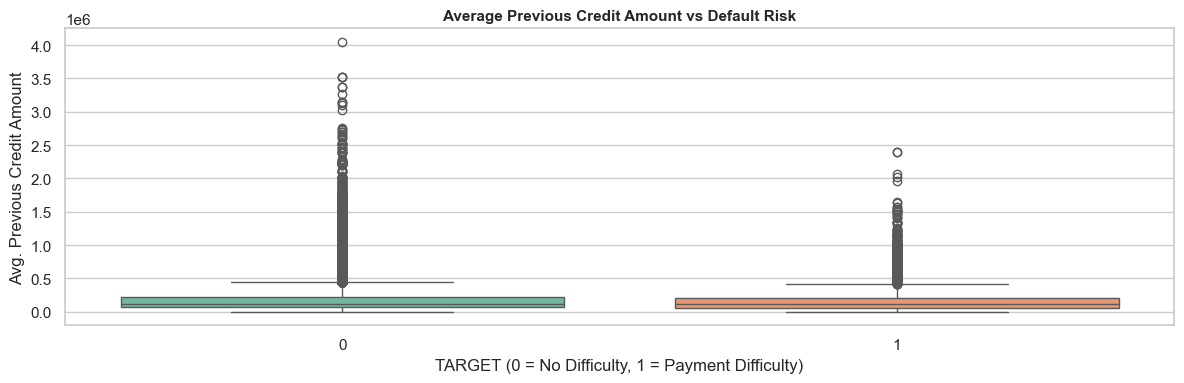

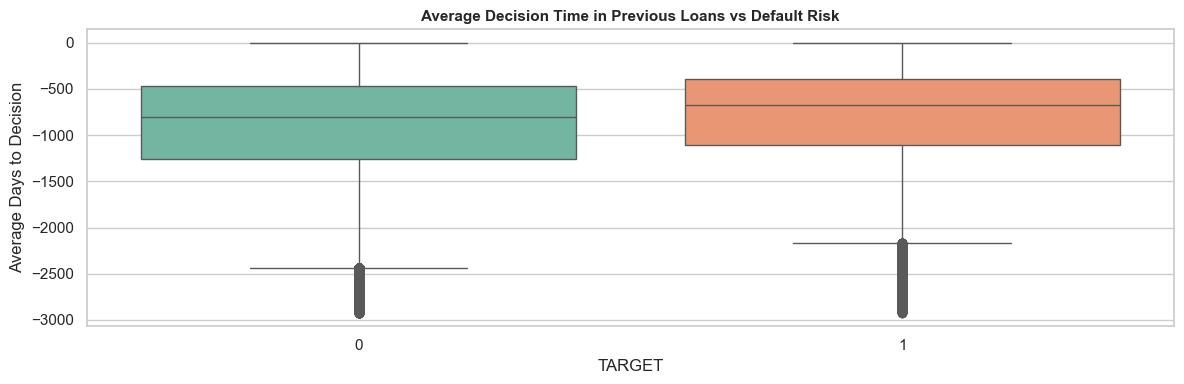

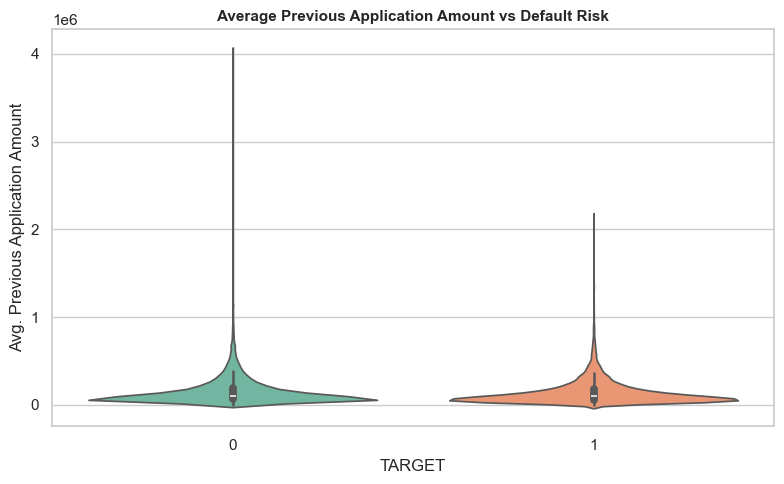

🔹 Correlation of previous loan metrics with TARGET:
TARGET                  1.000000
DAYS_DECISION_mean      0.046864
AMT_CREDIT_mean        -0.016115
AMT_APPLICATION_mean   -0.021803
Name: TARGET, dtype: float64


In [41]:
# ============================================
# ⚙️ STEP 16B (Fixed): Previous Loan Behavior vs Default Risk
# ============================================

cols_to_use = ['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT', 'DAYS_DECISION']
prev_df = prev_df[cols_to_use]

# 1️⃣ Aggregate numeric summaries per client
prev_summary = prev_df.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'max', 'min'],
    'AMT_CREDIT': ['mean', 'max', 'min'],
    'DAYS_DECISION': ['mean']
})

# 2️⃣ Flatten MultiIndex columns
prev_summary.columns = [f"{col[0]}_{col[1]}" for col in prev_summary.columns]
prev_summary.reset_index(inplace=True)

print("✅ Columns after aggregation:")
print(prev_summary.columns.tolist())

# 🔧 3️⃣ Drop duplicate columns before merging (fixes MergeError)
overlap = [c for c in prev_summary.columns if c in app_df.columns and c != 'SK_ID_CURR']
if overlap:
    print("⚠️ Dropping overlapping columns from app_df:", overlap)
    app_df.drop(columns=overlap, inplace=True)

# Merge safely
app_df = app_df.merge(prev_summary, on='SK_ID_CURR', how='left')
print("✅ Merged shape:", app_df.shape)

# ============================================
# 4️⃣ Visualization – Boxplots & Violin
# ============================================

plt.figure(figsize=(12, 4))
sns.boxplot(x='TARGET', y='AMT_CREDIT_mean', data=app_df, palette='Set2')
plt.title('Average Previous Credit Amount vs Default Risk', fontsize=11, weight='bold')
plt.xlabel('TARGET (0 = No Difficulty, 1 = Payment Difficulty)')
plt.ylabel('Avg. Previous Credit Amount')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
sns.boxplot(x='TARGET', y='DAYS_DECISION_mean', data=app_df, palette='Set2')
plt.title('Average Decision Time in Previous Loans vs Default Risk', fontsize=11, weight='bold')
plt.xlabel('TARGET')
plt.ylabel('Average Days to Decision')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(x='TARGET', y='AMT_APPLICATION_mean', data=app_df, palette='Set2', inner='box')
plt.title('Average Previous Application Amount vs Default Risk', fontsize=11, weight='bold')
plt.xlabel('TARGET')
plt.ylabel('Avg. Previous Application Amount')
plt.tight_layout()
plt.show()

# ============================================
# 5️⃣ Correlation Check
# ============================================

corr_cols = ['AMT_APPLICATION_mean', 'AMT_CREDIT_mean', 'DAYS_DECISION_mean', 'TARGET']
corr_existing = [c for c in corr_cols if c in app_df.columns]
print("🔹 Correlation of previous loan metrics with TARGET:")
print(app_df[corr_existing].corr()['TARGET'].sort_values(ascending=False))







---

## 💡 Business Insights & Conclusion

From the analysis, several important insights emerge:

- **Income Type, Credit Amount, and Education Level** are among the most influential factors affecting payment difficulties.  
- Clients with **lower income** and **higher loan amounts** show a higher chance of defaulting.  
- **Employment stability** and **age** also correlate with repayment capacity.  
- The correlation heatmap highlights key feature relationships useful for predictive modeling.

**Conclusion:**  
The dataset offers strong signals for risk prediction. By integrating these insights into model development, banks can better identify high-risk clients and take proactive measures to reduce defaults.

---

📘 *End of Report*